In [1]:
import numpy as np
import pandas as pd
import os

# defining dir variables 
root_dir = './fer2013/'
train_dir = root_dir + 'train/'
test_dir = root_dir + 'test/'

In [2]:
target_var = os.listdir(train_dir)

In [9]:
# import matplotlib.pyplot as plt

# fig, axes = plt.subplots(1, 7, figsize=(20,8))
# for i in range(len(target_var)):
#     d = train_dir+target_var[i]+'/'+os.listdir(train_dir+target_var[i]+'/')[0]
#     axes[i].imshow( plt.imread(d) )
#     axes[i].set_title(target_var[i])
# plt.show()

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using IDG to load images from directory
train_idg = ImageDataGenerator(rescale=1./255, validation_split=0.3) # 30 percent validation split for taining 
test_idg = ImageDataGenerator(rescale=1./255)
print(type(test_idg))

# Specify parameters/arguments for data generation
img_size = (48, 48)
batch_size = 64

arg_train = {'target_size': img_size,
             'color_mode': 'grayscale',
             'class_mode' : 'categorical',
             'batch_size': batch_size}
arg_test = {'target_size': img_size,
            'color_mode': 'grayscale',
            'class_mode' : 'categorical',
            'batch_size': batch_size,
            'shuffle': False}

train = train_idg.flow_from_directory(directory=train_dir, subset='training', **arg_train)
valid = train_idg.flow_from_directory(directory=train_dir, subset='validation', **arg_train)
test  = test_idg.flow_from_directory(directory=test_dir, **arg_test)

<class 'keras.preprocessing.image.ImageDataGenerator'>
Found 20099 images belonging to 7 classes.
Found 8610 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [12]:
input_size=(48,48,1)
classes = 7
model = tf.keras.Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                  

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0005),loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train , validation_data=valid, epochs=20)

Epoch 1/20


2021-12-10 00:35:58.681916: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8300


315/315 [==============================] - 11s 30ms/step - loss: 1.7639 - accuracy: 0.2809 - val_loss: 1.5981 - val_accuracy: 0.3704
Epoch 2/20
315/315 [==============================] - 5s 16ms/step - loss: 1.5217 - accuracy: 0.4067 - val_loss: 1.4068 - val_accuracy: 0.4545
Epoch 3/20
315/315 [==============================] - 5s 15ms/step - loss: 1.3590 - accuracy: 0.4836 - val_loss: 1.2939 - val_accuracy: 0.4987
Epoch 4/20
315/315 [==============================] - 5s 15ms/step - loss: 1.2717 - accuracy: 0.5138 - val_loss: 1.2323 - val_accuracy: 0.5318
Epoch 5/20
315/315 [==============================] - 5s 15ms/step - loss: 1.2045 - accuracy: 0.5436 - val_loss: 1.1910 - val_accuracy: 0.5452
Epoch 6/20
315/315 [==============================] - 5s 15ms/step - loss: 1.1442 - accuracy: 0.5645 - val_loss: 1.1672 - val_accuracy: 0.5513
Epoch 7/20
315/315 [==============================] - 5s 15ms/step - loss: 1.0898 - accuracy: 0.5854 - val_loss: 1.1586 - val_accuracy: 0.5596
Epoch 8/2

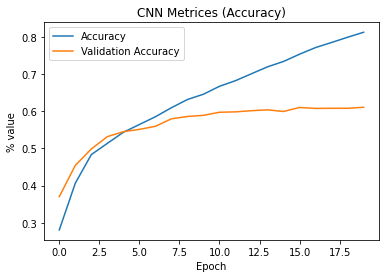

In [14]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Metrices (Accuracy)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

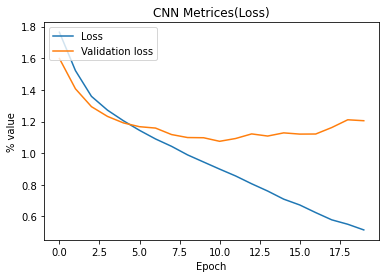

In [15]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('CNN Metrices(Loss)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [16]:
y_pred = model.predict(test)

In [17]:
y_pred_labels = []
for i in y_pred:
    y_pred_labels.append(np.argmax(i))

In [18]:
y_actual = test.classes[test.index_array]

In [19]:
model.save_weights('model_new_1011.h5')

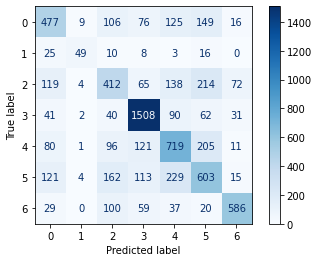

In [20]:
from sklearn import metrics
import matplotlib as mpl
cm = metrics.confusion_matrix(y_actual, y_pred_labels)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=mpl.cm.Blues, )
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_pred_labels, digits=4))

              precision    recall  f1-score   support

           0     0.5348    0.4979    0.5157       958
           1     0.7101    0.4414    0.5444       111
           2     0.4449    0.4023    0.4226      1024
           3     0.7733    0.8501    0.8099      1774
           4     0.5362    0.5831    0.5587      1233
           5     0.4752    0.4836    0.4793      1247
           6     0.8016    0.7052    0.7503       831

    accuracy                         0.6066      7178
   macro avg     0.6109    0.5662    0.5830      7178
weighted avg     0.6044    0.6066    0.6038      7178



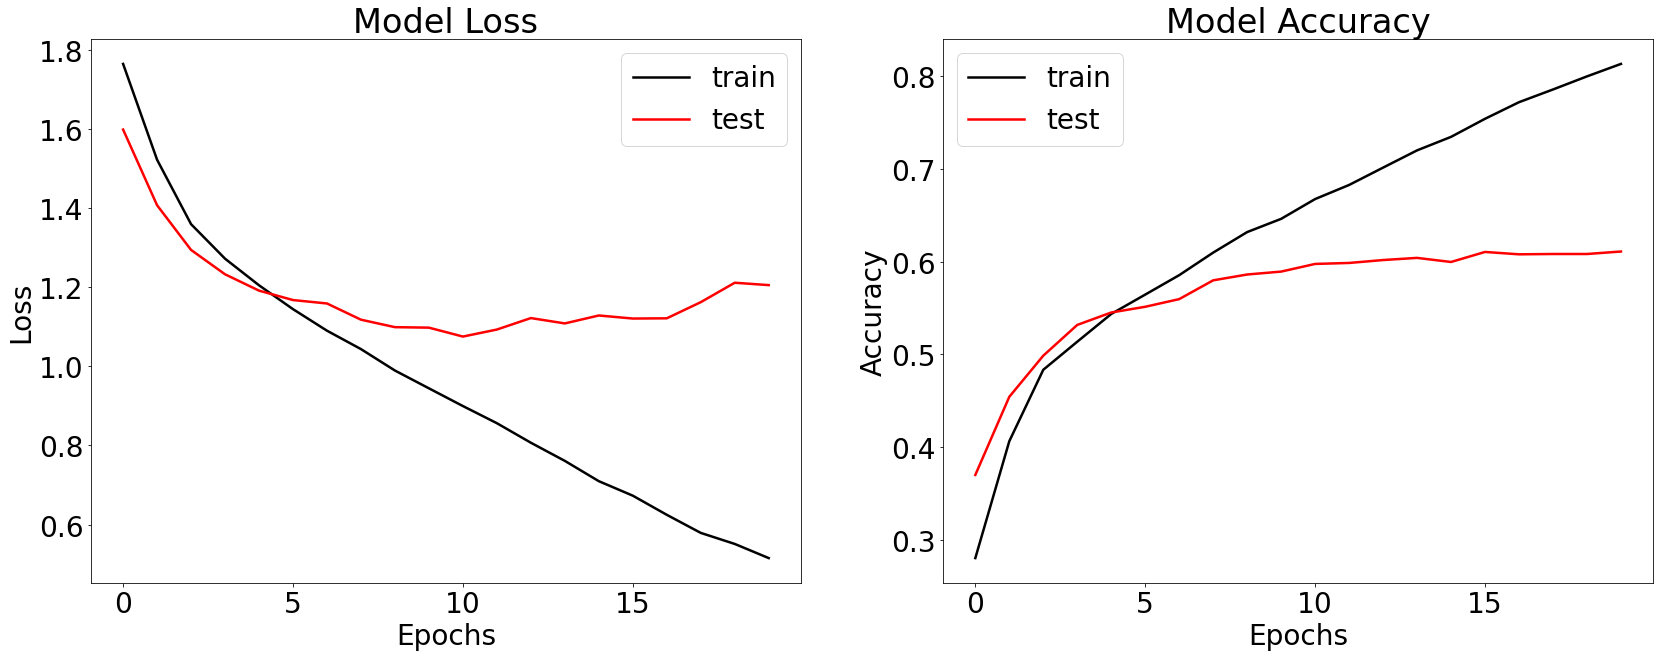

In [22]:
def plot_graph(obj, mtype):
    plt.figure(figsize=(28,10))
    plt.rcParams.update({'font.size':28})
    fig1 = plt.subplot(1,2,2)
    fig1.plot(obj.history['accuracy'],linewidth=2.5, color='black')
    fig1.plot(obj.history['val_accuracy'],linewidth=2.5, color='red')
    fig1.set_title('Model Accuracy')
    fig1.set_xlabel('Epochs')
    fig1.set_ylabel('Accuracy')
    fig1.legend(['train', 'test'], loc='upper left')

    fig2 = plt.subplot(1,2,1)
    fig2.plot(obj.history['loss'], linewidth=2.5, color='black')
    fig2.plot(obj.history['val_loss'], linewidth=2.5, color='red')
    fig2.set_title('Model Loss')
    fig2.set_xlabel('Epochs')
    fig2.set_ylabel('Loss')
    fig2.legend(['train', 'test'], loc='upper right')

    plt.savefig("model_"+mtype+"_stats.jpg")
    plt.show()

plot_graph(history, "small")

model_train: 
Confusion Matrix
[[ 405   39  384  679  510  462  318]
 [  36    6   45   68   51   55   45]
 [ 373   39  422  740  511  483  300]
 [ 692   64  711 1312  912  821  539]
 [ 490   55  478  863  645  584  361]
 [ 502   53  443  884  573  550  376]
 [ 281   45  320  593  371  378  232]]
Classification Report
              precision    recall  f1-score   support

       angry       0.15      0.14      0.15      2797
     disgust       0.02      0.02      0.02       306
        fear       0.15      0.15      0.15      2868
       happy       0.26      0.26      0.26      5051
     neutral       0.18      0.19      0.18      3476
         sad       0.17      0.16      0.16      3381
    surprise       0.11      0.10      0.11      2220

    accuracy                           0.18     20099
   macro avg       0.15      0.15      0.15     20099
weighted avg       0.18      0.18      0.18     20099

model_test: 
Confusion Matrix
[[ 477    9  106   76  125  149   16]
 [  25   49   1

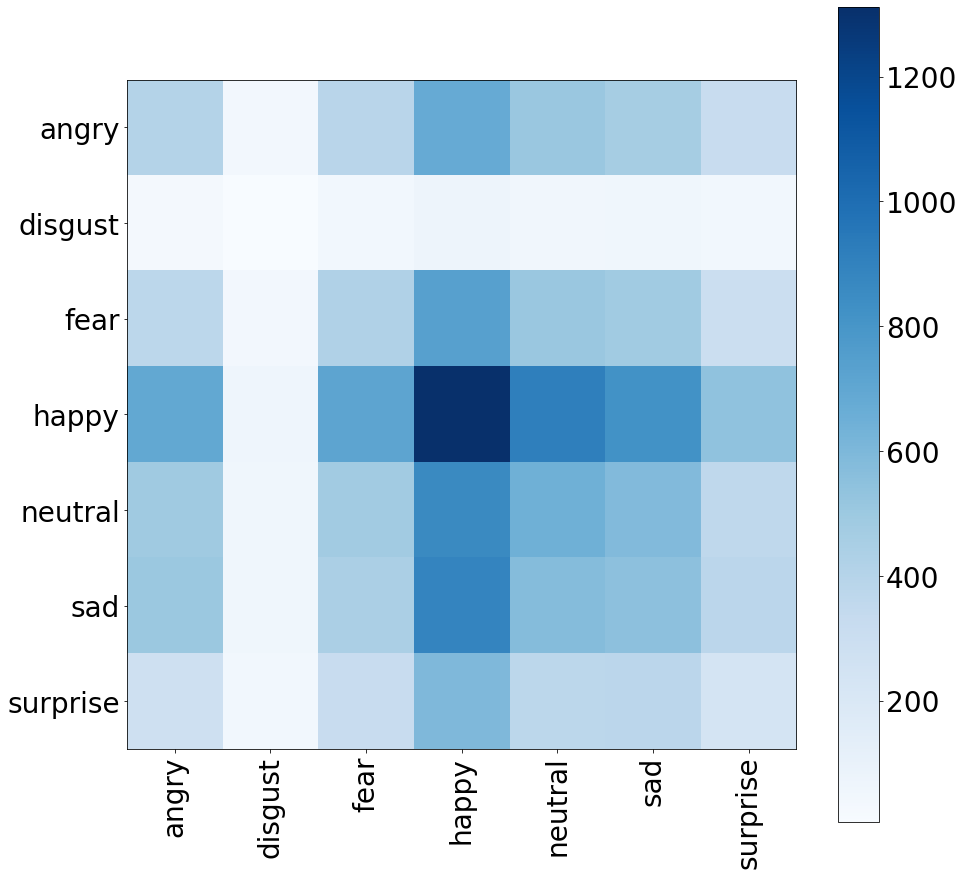

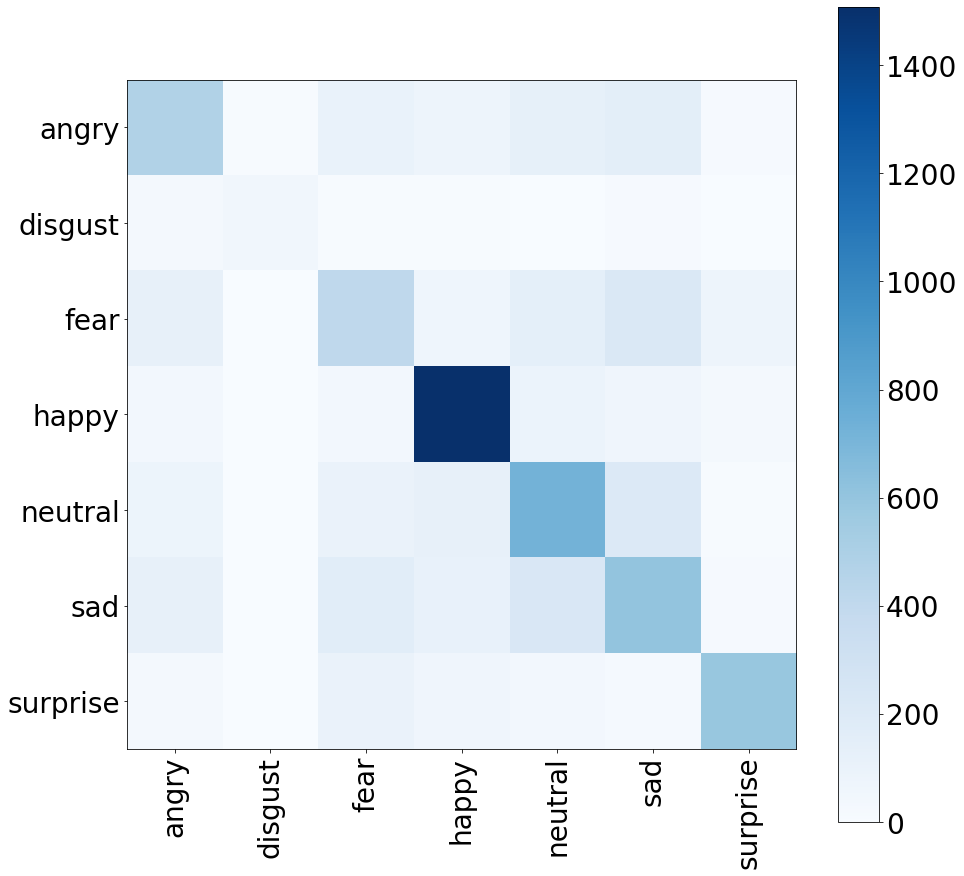

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
def draw_conf(model, set_name, label):
    print(label)
    y_pred = model.predict(set_name)
    y_pred = np.argmax(y_pred, axis=1)
    class_labels = set_name.class_indices
    class_labels = {v:k for k,v in class_labels.items()}

    cm_ = confusion_matrix(set_name.classes, y_pred)
    print('Confusion Matrix')
    print(cm_)
    print('Classification Report')
    target_names = list(class_labels.values())
    print(classification_report(set_name.classes, y_pred, target_names=target_names))
    
    plt.figure(figsize=(15,15))
    plt.imshow(cm_, interpolation='nearest', cmap=mpl.cm.Blues)
    plt.colorbar()
    tick_mark = np.arange(len(target_names))
    _ = plt.xticks(tick_mark, target_names, rotation=90)
    _ = plt.yticks(tick_mark, target_names)
    plt.savefig(label+'.jpg')

draw_conf(model, train, "model_train: ")
draw_conf(model, test, "model_test: ")

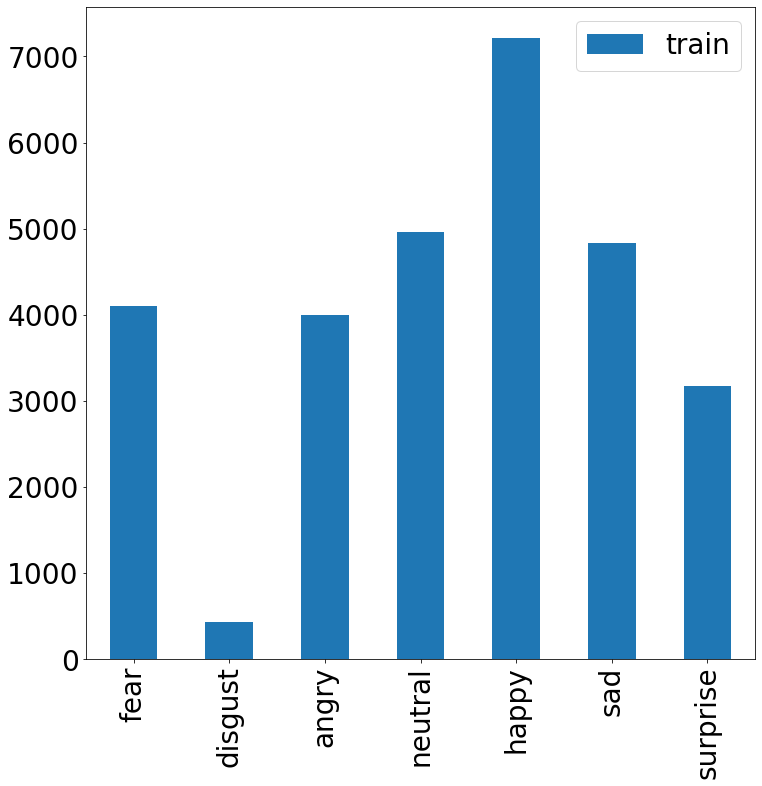

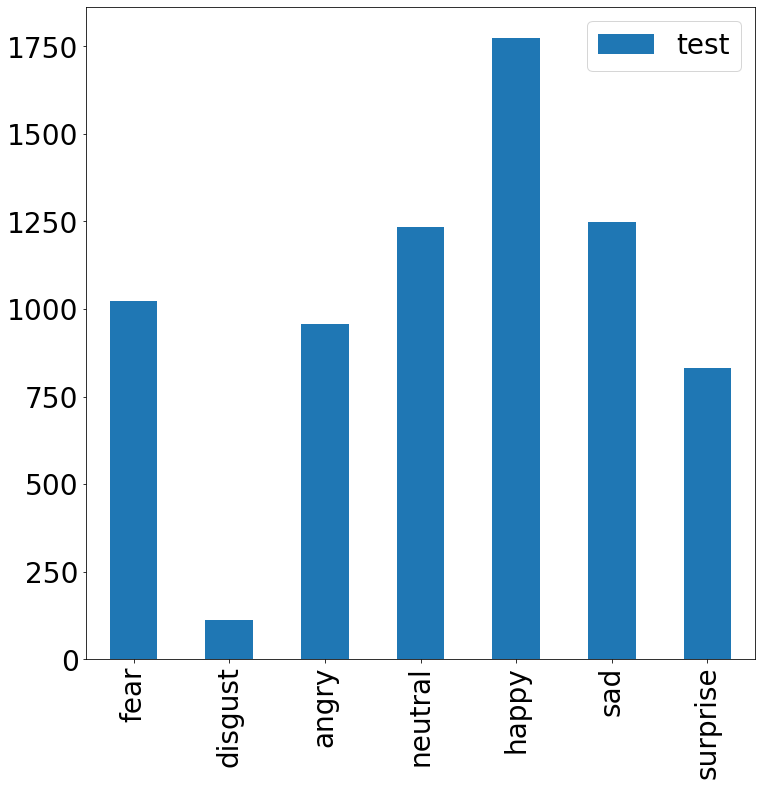

In [24]:
def club_expr(path, set_name):
    temp = {}
    for expr in os.listdir(path):
        temp[expr] = len(os.listdir(path+expr))
    return pd.DataFrame(temp, index=[set_name])
def save_fig1(plot, label):
    fig=plot.get_figure()
    fig.savefig(label+".png")    
train_count = club_expr(train_dir, 'train')
test_count = club_expr(test_dir, 'test')
train_plot=train_count.transpose().plot(kind='bar', figsize=(12,12))
test_plot=test_count.transpose().plot(kind='bar', figsize=(12,12))
save_fig1(train_plot, "train_dataset")
save_fig1(test_plot, "test_dataset")
